# Group Project Step 2

### Importing numpy, matplotlib, scipy and pandas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
from scipy.optimize import curve_fit

In [31]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype = [('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

In [35]:
df = pd.DataFrame(data)
print(df.columns)

Index(['day', 'time', 'height'], dtype='object')


In [39]:
def time_to_decimal(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60

df['time_decimal'] = df['time'].apply(time_to_decimal) / 24

df['time_decimal_day'] = df['day'] + df['time_decimal']

print(df[['day', 'time', 'time_decimal', 'time_decimal_day']].head())

   day   time  time_decimal  time_decimal_day
0    1   8:07      0.338194          1.338194
1    1  15:37      0.650694          1.650694
2    2   8:55      0.371528          2.371528
3    2  16:25      0.684028          2.684028
4    3   9:45      0.406250          3.406250


In [40]:
def oscillatory_model(t, A1, omega1, phi1, A2, omega2, phi2, C):
    
    return (A1 * np.sin(omega1 * t + phi1) +
            A2 * np.sin(omega2 * t + phi2) +
            C)

In [41]:
initial_guess = [3, 2 * np.pi / 24, 0, 2, 2 * np.pi / (24 * 14), 0, 0]

sigma = np.full(len(df), 0.25)

params, covariance = curve_fit(
    oscillatory_model,
    df['time_decimal_day'], df['height'], p0=initial_guess, sigma=sigma, absolute_sigma = True)

A1, omega1, phi1, A2, omega2, phi2, C = params

In [42]:
t_fit = np.linspace(df['time_decimal_day'].min(), df['time_decimal_day'].max(), 1000)
fitted_tide = oscillatory_model(t_fit, *params)

<function matplotlib.pyplot.show(close=None, block=None)>

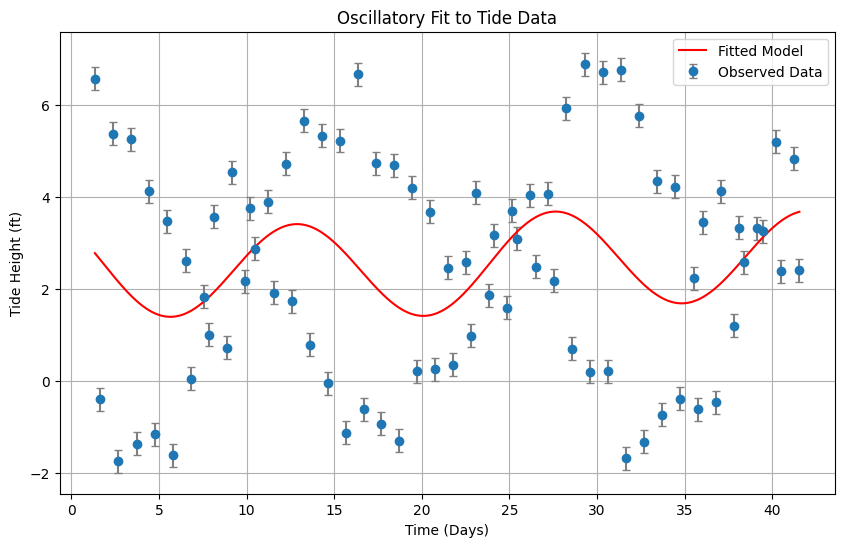

In [44]:
plt.figure(figsize=(10, 6))
plt.errorbar(df['time_decimal_day'], df['height'], yerr=0.25, fmt='o',  label='Observed Data', ecolor='gray', capsize=3)
plt.plot(t_fit, fitted_tide, '-', color='red', label='Fitted Model')
plt.xlabel('Time (Days)')
plt.ylabel('Tide Height (ft)')
plt.title('Oscillatory Fit to Tide Data')
plt.legend()
plt.grid(True)
plt.savefig('tide_fit.pdf')
plt.show

In [45]:
print("Fitted Parameters:")
print(f"A1 (Amplitude 1): {A1:.3f}")
print(f"omega1 (Angular Frequency 1): {omega1:.3f}")
print(f"phi1 (Phase 1): {phi1:.3f}")
print(f"A2 (Amplitude 2): {A2:.3f}")
print(f"omega2 (Angular Frequency 2): {omega2:.3f}")
print(f"phi2 (Phase 2): {phi2:.3f}")
print(f"C (Offset): {C:.3f}")

Fitted Parameters:
A1 (Amplitude 1): 1.044
omega1 (Angular Frequency 1): 0.429
phi1 (Phase 1): -3.949
A2 (Amplitude 2): 0.183
omega2 (Angular Frequency 2): 0.137
phi2 (Phase 2): -3.267
C (Offset): 2.553
